In [1]:
import main

# Steam Game Data Analysis

Lily Wei and Fiona McSherry


## Question

Video games are a significant part of today's society. They act as a form of entertainment, a way for people to interact socially across the globe, a tool for education, and can even be used to create works of art.

Video games have become a diverse and influential form of entertainment, with a large range of different user experiences for people to explore to their own preferences. Because of this huge diversity, it is very difficult to pinpoint what exactly makes a popular and loved game. In this essay, we explore the question: what makes a popular video game?


## Method

To answer this question we used data from the game platform Steam. Steam is a video game digital distribution service and storefront that allows users to purchase games and play them on any compatible device logged into their account.

From Steam we gather data from the list of the top 100 most played games based upon the number of current players ([ https://store.steampowered.com/charts/mostplayed](https://store.steampowered.com/charts/mostplayed) ). From this list we pulled data about each individual game on the list, including its top 3 genres, price, peak number of players, number of reviews, and positivity of reviews. This helps us find the correlation between known popular games and answer our question.


### Data Retrieval

To obtain this data we utilized the requests python library, the bs4 (Beautiful Soup) library, the pandas library, the Playwright library, and the Regex library. 

Since we are sending Steam a ton of requests to get all our data, we decided that it would be best to store all the retrieved data in a CSV file. This allows us to run our code for data analysis just once as opposed to re-requesting data every time we run our code. Our process of data retrieval is split into two files: `get_data` and `write_csv`.  `get_data` contains all the functions needed to retrieve data points from the game page HTMLs.  `write_csv` is where we run all these functions and store the data into a csv. 

Below is a more detailed account of how we did our data retrieval.



* Using `Playwright`, we run a headless browser of Steam’s Most Played page. This page as we said above contains a list of the top 100 most played Steam games based on the current concurrent player count. We needed to run a headless browser as part of the website uses JavaScript. A headless browser allows this JavaScript to be rendered as HTML first. 
* From the headless browser, we request the HTML of the Most Played page. This HTML not only contains the links to these games but also contains the game prices and peak concurrent player count within the last 24 hours. 
* We then store the HTML in a Beautiful Soup object and use the `Beautiful Soup` library to break down the HTML into the parts we want. We do this by getting the section of the HTML called ***tbody***, which is the body text. The ***tbody*** element contains all the elements of the table that lists out the data stated above. 

* We get the links for the games by using `Regex` and store it in a list.
* We get the name of the game through the link as the last part of the link is the game name and store it in a list.
* Afterwards, we get the price and the peak players of each game in the same function. To do this, we break up the ***tbody*** HTML into even smaller sections by separating the HTML into its ***tr*** (table row) elements. Each of these sections is stored as a string in a list.
* These elements contain each separate game and its respective price and peak players in different elements. Fortunately, everything within each element was structured the same so we could look for specific characters as opposed to parsing through the entire string.
* Within the ***tr*** element, there are two cases of prices: Free to Play or a $ followed by a number value. Finding this allows us to add each price to a list.
* Again, luckily for us, the last ***td*** (data cell) element in the ***tr*** element is the peak player count. So, we simply just looked for the last ***td*** element and took everything between it.  

* To find the number of reviews and the positivity of them, we examine a Beautiful Soup object of the individual game's html content. Among this, there is a class called `nonresponsive_hidden responsive_reviewdesc` which contains a string of the number of reviews and the percentage of their positivity. The percent of positive reviews always directly follows the character `"-"` and ends with the character `"%"`, so the value between those two characters is the positivity. This percent is always follows by `"of the"` and the number of reviews. So we can retrieve the number of reviews by taking the value between the end of the `"of the"` and before string `"user reviews"`. 

* To get the top 3 genres of each game, we examine the Beautiful Soup object of that game page's html content. The class `glance_tags popular_tags` contains the many genres associated with that game, so we find the occurance of this. However this can be quite a lot so we chose to only look at the 3 most relevant in our analysis. 

* In `write_csv`, we run all of the `get_data` functions and write them into a `Pandas` dataframe. This is then written into a csv file.

### Data Analysis

Now to analyze this data in order to answer our research question. The following are done using functions found in `analyze_data` run in `main`.  `main` is also where we create plots for visualization.

* First, we convert the csv file into a list, and return each of its elements. 

* Then, we find how many of the reviews of each game are positive and how many are negative.

* From this list, we find the top 10 most positively reviewed games, and the top 10 most negatively reviewed games and how many players each of those games has. This is dependent on the percentage of positive reviews.

* We also find the top 10 games with the *most* positive and negative reviews. This is dependant both on percentage and the number of reviews. 

* We also find the number of players in games of each price category, ranging from free, to over 50 dollars.

* Another complilation we look at is the number of players in each genre. 

Now we create our visualization comparisons in `main`.

## Results

The first plot we create compares the overall positivity of reviews to the number of peak players.

[87, 81, 58, 78, 98, 84, 87, 54, 75, 85, 87, 98, 87, 96, 75, 88, 91, 93, 55, 92, 94, 88, 80, 91, 86, 76, 77, 91, 71, 91, 87, 80, 97, 97, 83, 72, 17, 94, 88, 96, 83, 97, 97, 95, 92, 94, 97, 89, 88, 93, 75, 45, 82, 98, 65, 74, 62, 97, 93, 97, 86, 94, 75, 88, 75, 96, 94, 71, 91, 24, 93, 92, 57, 94, 86, 89, 76, 86, 83, 96, 97, 88, 47, 96, 86, 81, 96, 82, 83, 97, 58, 88, 87, 97, 97, 87, 97]
[1491977, 615009, 637297, 387994, 178483, 229209, 144922, 146265, 289787, 145971, 110381, 104865, 75290, 98742, 72447, 98411, 68282, 71611, 60973, 63873, 74502, 65354, 60139, 54544, 53452, 54044, 47885, 44263, 54886, 40667, 36659, 46110, 39581, 37192, 34420, 30661, 35728, 31171, 31514, 30958, 28226, 30560, 26612, 39844, 37028, 27884, 32399, 33507, 26608, 29791, 25025, 31209, 26101, 23888, 22884, 28003, 23816, 26832, 25304, 22909, 23843, 22036, 24542, 28179, 21330, 27961, 24269, 38736, 20739, 22282, 21843, 20201, 26049, 20054, 23400, 22247, 19931, 17629, 18981, 17752, 18685, 18817, 19961, 17176, 20176, 21

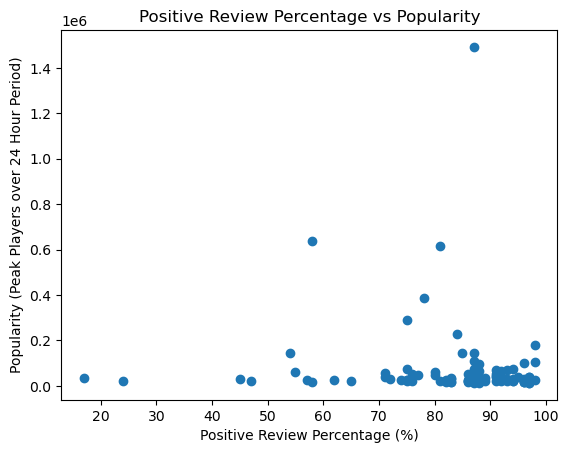

In [2]:
main.create_plot("scatter", main.percent_positive, main.peak_players, "Positive Review Percentage vs Popularity", "Positive Review Percentage (%)", "Popularity (Peak Players over 24 Hour Period)")

This graph shows many more data points clustered above 70% positive reviews. This means that generally popular games are of a higher quality, since we are analyzing the top 100 games list and a majority of them contain very positive reviews. 

We also see an extreme outlier at the very top right, with over 1.5 million players and around 90% positive reviews, but this plot does not help us pinpoint what makes this game unique. Identifying the game, it is Counter-Strike 2 which was intially released in September of 2023 in comparison to other games on the list that are mostly older (Warframe, for example, was released in 2013). We can conclude from this that it has so many more players because it is a very recent release. 

This information tells us that the other games that seem to all have a similar number of peak players have longevity due to their quality. 

So, a game's quality is important to making it popular, and over time helps it retain popularity. 

The next plot compares cost of a games to the number of players active. 

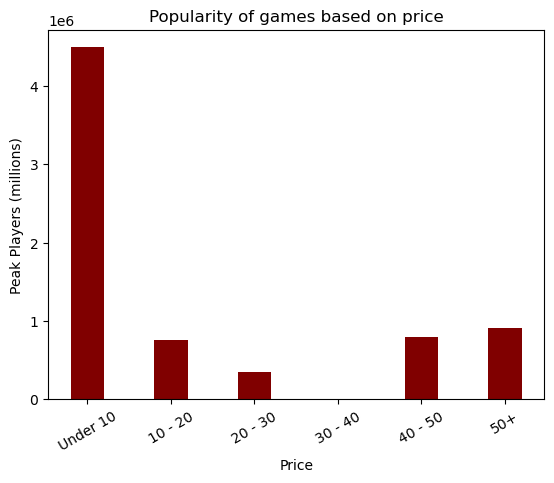

In [3]:
main.create_plot("bar", main.price_points, main.price_points_popularity, "Popularity of games based on price", "Price", "Peak Players (millions)")

There is a sharp spike in popularity for games under 10 dollars, with over 4 million players on these games. In comparison, the other prices all have below 1 million players. This tells us that the price of a game is extremely impactful on its popularity, with cheaper games gaining more players.  

The next plot shows the number of games that have each genre. 

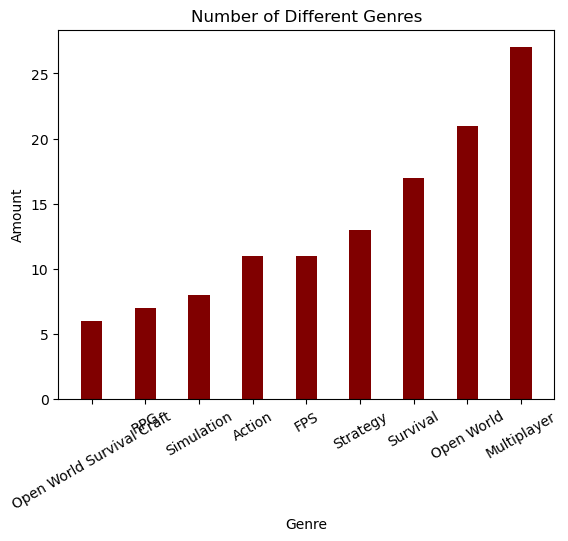

In [4]:
main.create_plot("bar", main.genre_most_common, main.genre_most_common_number, "Number of Different Genres", "Genre", "Amount")

This plot shows that many of the games on the top 100 list are survival, open world, and multiplayer. This tells us that games with those genres are more likely to become popular.

The next plot shows the genres with the highest number of players.

In [ ]:
main.create_plot(main.genre_most_popular, main.genre_most_popular_popularity, "Popularity of genres", "Genre", "Peak Players (millions)")

TypeError: create_plot() missing 1 required positional argument: 'labely'

There is the biggest amount of popularity in Multiplayer games, with Shooter and First Person shooter games also being popular. From our previous plot, we know that the top 100 contains many multiplayer games. Together with this graph we can conclude that multiplayer games commonly become popular, and that they garner more popularity, since the number of players in multiplayer is higher. We can also conclude that although there are more games with open world and survival genres in the list, these games have much less players so they aren't extremely popular. Additionally, there is a high number of players in shooter and FPS, even though not many games in the list are that genre. So, the games that become popular with those tags seem to become *very* popular. This tells us that a games genre is important to its popularity, with safe bets to poularity being multiplayer, survival, and open world, and high-risk high-reward genres being shooter and FPS.

## Conclusion

There seem to be 2 types of popular games. Those with positive reviews that are moderately popular, and those that become massively popular with large amounts of players. There are far more moderately popular games that massively popular games, and they seem to have different ways to reaching that. 

To reach a moderately popular game, 